In [1]:
import numpy as np # for array operations and for mean absolute relative error
import pandas as pd # for working with DataFrames
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('porocal.csv')
df.head()

,Depth,GR,NPHI,RES,PHIF
0,3666.5916,54.521200,0.347343,0.021643,19.9843
1,3666.8964,54.368690,0.372180,0.021642,24.2380
2,3667.0488,54.292435,0.475308,0.021641,22.6408
3,3667.2012,54.216180,0.423369,0.021640,21.6169
4,3667.3536,54.139925,0.408307,0.021640,17.8107


In [3]:
x = df.drop('PHIF', axis = 1) # Features
y = df['PHIF']  # Target

array([[<AxesSubplot:title={'center':'Depth'}>,
        <AxesSubplot:title={'center':'GR'}>],
       [<AxesSubplot:title={'center':'NPHI'}>,
        <AxesSubplot:title={'center':'RES'}>]], dtype=object)

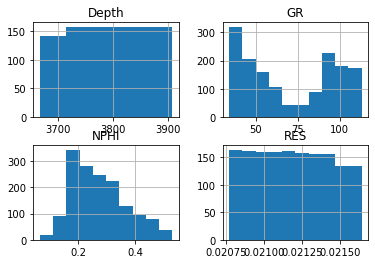

In [4]:
df.hist(column=['Depth', 'GR', 'NPHI', 'RES'])

(3660.0, 3920.0)

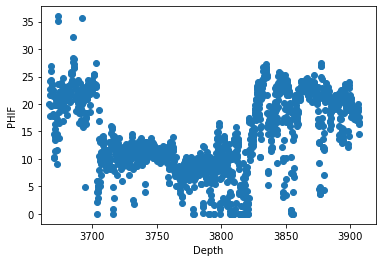

In [5]:
plt.scatter(x['Depth'], y)
plt.xlabel('Depth')
plt.ylabel('PHIF')
plt.xlim(3660, 3920)
plt.xlim(3660, 3920)
#plt.plot([0,30], [0,30], 'black')

(35.0, 113.0)

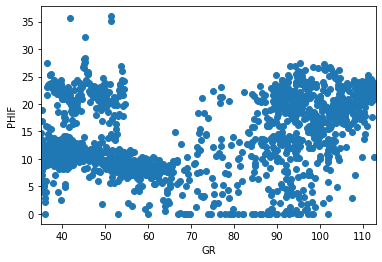

In [6]:
plt.scatter(x['GR'], y)
plt.xlabel('GR')
plt.ylabel('PHIF')
plt.xlim(35, 113)
plt.xlim(35, 113)

(0.06, 0.6)

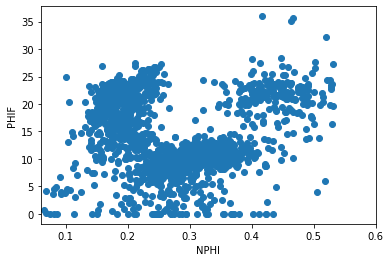

In [7]:
plt.scatter(x['NPHI'], y)
plt.xlabel('NPHI')
plt.ylabel('PHIF')
plt.xlim(0.06, 0.6)
plt.xlim(0.06, 0.6)
#plt.plot([0,30], [0,30], 'black')

(0.0207, 0.0217)

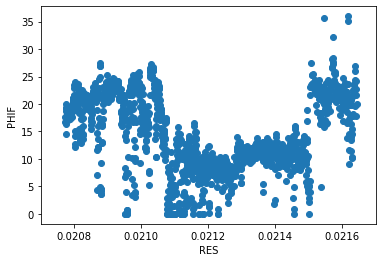

In [8]:
plt.scatter(x['RES'], y)
plt.xlabel('RES')
plt.ylabel('PHIF')
plt.xlim(0.0207, 0.0217)
plt.xlim(0.0207, 0.0217)
#plt.plot([0,30], [0,30], 'black')

In [9]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # for building the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn import metrics 

In [10]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
rfr = RandomForestRegressor(random_state = 42)

In [12]:
param_grid = { 
    'min_samples_leaf':np.arange(1,20,1)
}

In [13]:
start_time = datetime.now() #time measurement begins

CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
CV_rfr.fit(x_train, y_train)

end_time = datetime.now() #time measurement ends

In [14]:
CV_rfr.best_params_

{'min_samples_leaf': 1}

In [15]:
print('Run Time: {}'.format(end_time - start_time))

Run Time: 0:00:13.145564


In [16]:
df_grid_search = pd.DataFrame(CV_rfr.cv_results_)
df_grid_search = df_grid_search.sort_values("rank_test_score")
df_grid_search.to_csv("cv_results.csv")

In [17]:
rfr1=RandomForestRegressor(random_state=42, min_samples_leaf=CV_rfr.best_params_["min_samples_leaf"])

In [18]:
rfr1.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
y_val_pred = rfr1.predict(x_val)

In [20]:
corr_matrix = np.corrcoef(y_val, y_val_pred)
corr = corr_matrix[0,1]
r21 = corr**2
print("R2 of Validation Model =", r21)

R2 of Validation Model = 0.8261369826954945


In [21]:
mse1 = metrics.mean_squared_error(y_val, y_val_pred)
print("Mean Square Error of Validation Model =", mse1)

Mean Square Error of Validation Model = 7.932578175859837


In [22]:
mse1 = metrics.mean_squared_error(y_val, y_val_pred)
rmse1 = mse1**0.5
print("Root Mean Square Error of Validation Model =", rmse1)

Root Mean Square Error of Validation Model = 2.8164832994107805


In [23]:
mae1 = metrics.mean_absolute_error(y_val, y_val_pred)
mae1
print("Mean Absolute Error of Validation Model =", mae1)

Mean Absolute Error of Validation Model = 1.8584198483870964


In [24]:
theta = np.polyfit(y_val, y_val_pred, 1)
print(f'The parameters of the line: {theta}')
y_line = theta[1] + theta[0] * y_val #best fit line

The parameters of the line: [0.86051986 2.13538028]


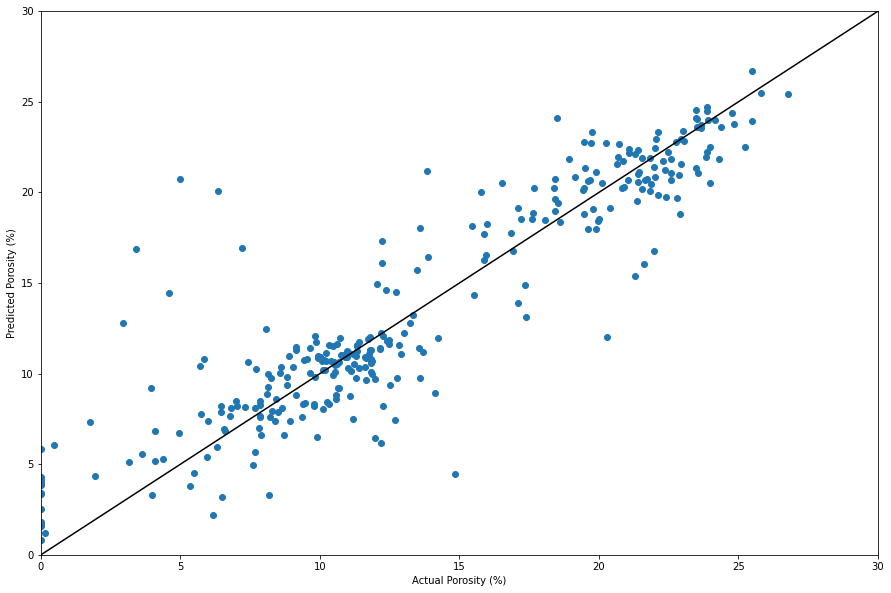

In [25]:
fig = plt.figure(figsize=(15, 10))
plt.scatter(y_val, y_val_pred)
plt.xlabel('Actual Porosity (%)')
plt.ylabel('Predicted Porosity (%)')
plt.xlim(0, 30)
plt.ylim(0, 30)
plt.plot([0,30], [0,30], 'black')

In [26]:
y_val_sort = y_val.sort_index(axis = 0) #Sorting y_test based on index number

In [27]:
y_val.sort_index(axis = 0).index #extracting indices of y_test values

Int64Index([  15,   23,   29,   30,   32,   43,   44,   49,   51,   56,
            ...
            1480, 1490, 1497, 1498, 1500, 1507, 1512, 1516, 1536, 1541],
           dtype='int64', length=310)

In [28]:
df_val_depth = df['Depth'].iloc[y_val.sort_index(axis = 0).index]

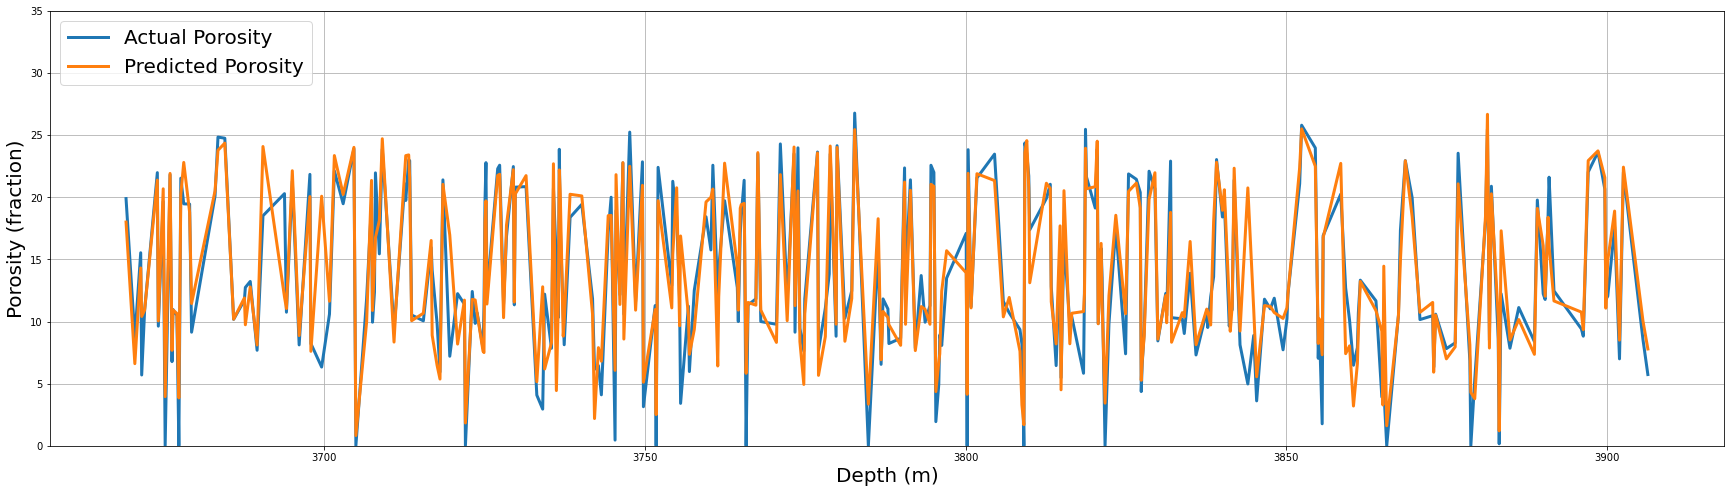

In [29]:
plt.figure(figsize=(30,8))
plt.xlabel('Depth (m)', fontsize=20)
plt.ylabel('Porosity (fraction)', fontsize=20)
plt.plot(df_val_depth, y_val, label = 'Actual Porosity', linewidth=3)
plt.plot(df_val_depth, y_val_pred, label = 'Predicted Porosity', linewidth=3)
plt.legend(loc="upper left", fontsize=20)
plt.ylim(0, 35)
plt.grid()

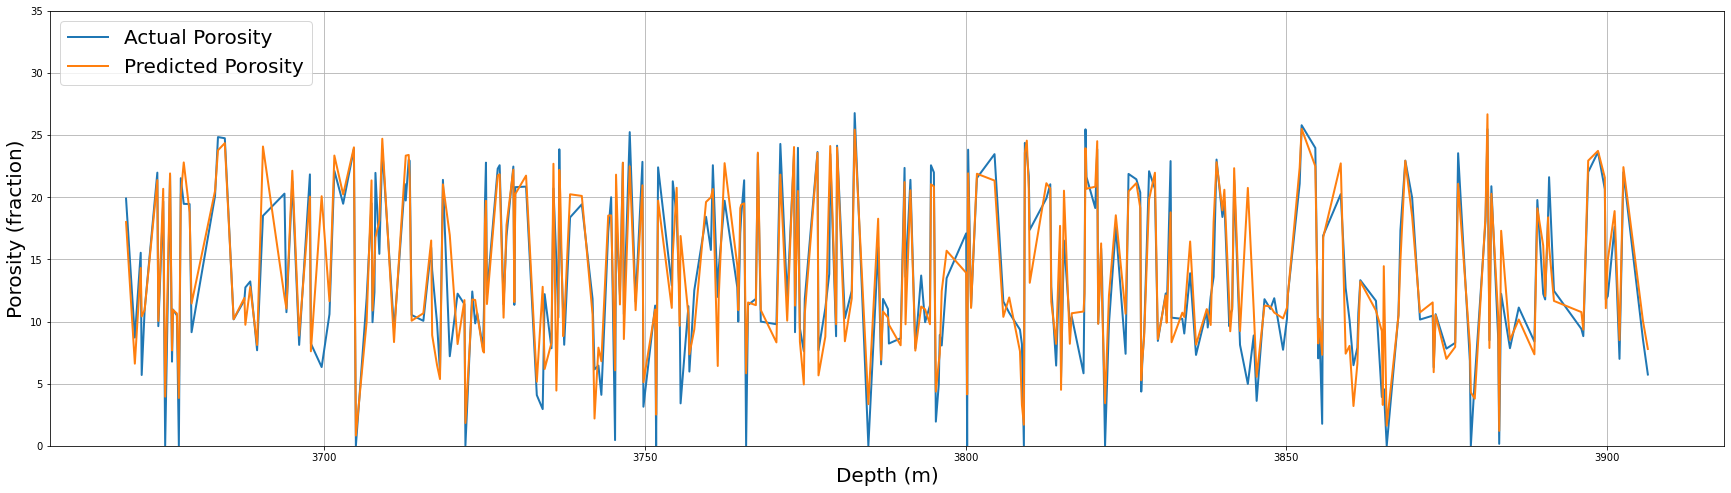

In [30]:
plt.figure(figsize=(30,8))
plt.xlabel('Depth (m)', fontsize=20)
plt.ylabel('Porosity (fraction)', fontsize=20)
plt.plot(df_val_depth, y_val, label = 'Actual Porosity', linewidth=2)
plt.plot(df_val_depth, y_val_pred, label = 'Predicted Porosity', linewidth=2)
plt.legend(loc="upper left", fontsize=20)
plt.ylim(0, 35)
plt.grid()

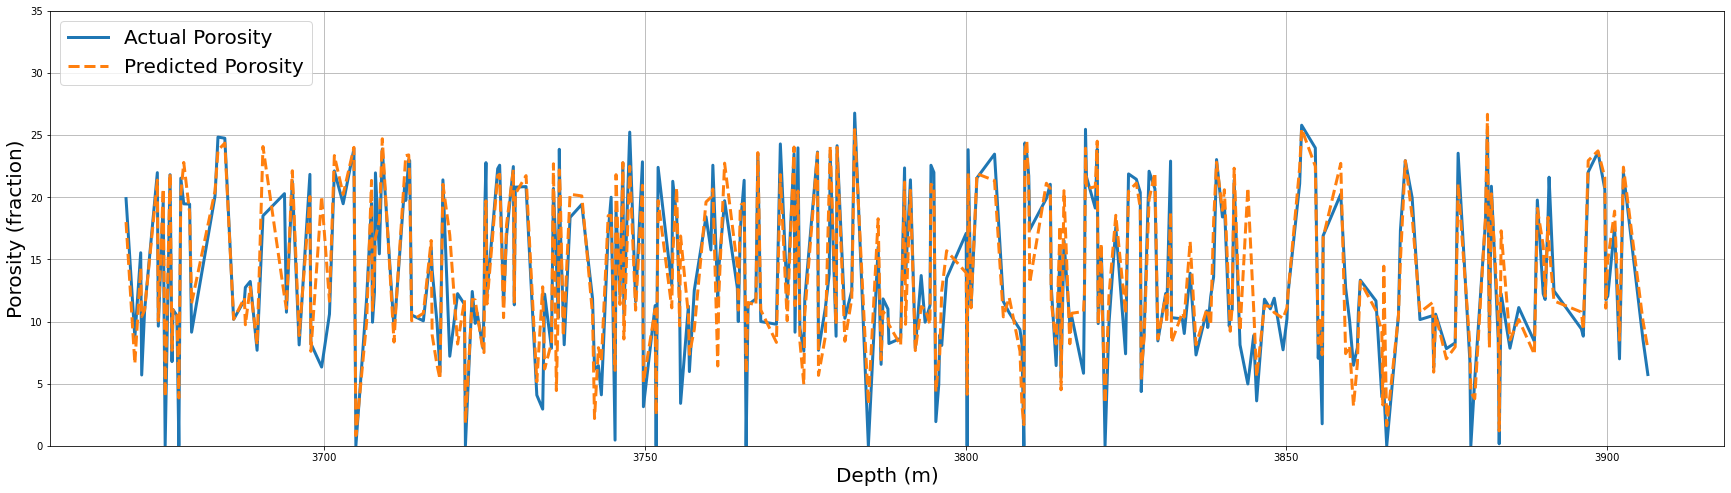

In [31]:
plt.figure(figsize=(30,8))
plt.xlabel('Depth (m)', fontsize=20)
plt.ylabel('Porosity (fraction)', fontsize=20)
plt.plot(df_val_depth, y_val, label = 'Actual Porosity', linewidth=3)
plt.plot(df_val_depth, y_val_pred, label = 'Predicted Porosity', linewidth=3, linestyle = 'dashed')
plt.legend(loc="upper left", fontsize=20)
plt.ylim(0, 35)
plt.grid()

Text(0.5, 1.0, 'Feature Importance (MDI)')

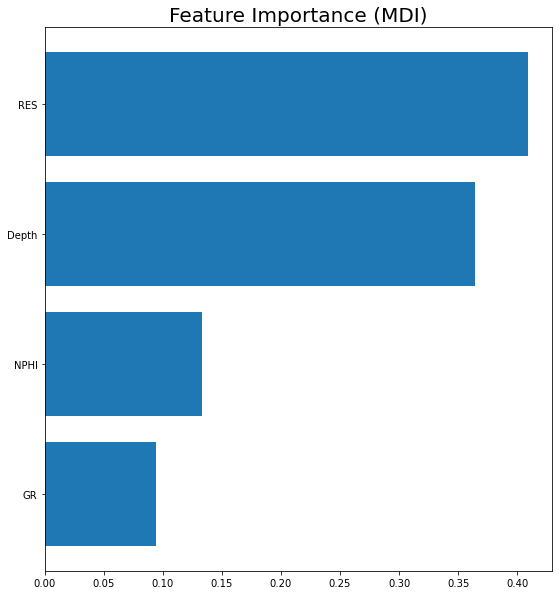

In [32]:
feature_importance = rfr1.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(['Depth', 'GR', 'NPHI', 'RES'])[sorted_idx])
plt.title('Feature Importance (MDI)', fontsize=20)